# Applied ML: Module 1

In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib import cm       # feature pairplot (scatter matrix)
from mpl_toolkits.mplot3d import Axes3D         # 3D plots

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Data
fruits = pd.read_table("data/fruit_data_with_colors.txt")       # read_table for txt files

print(fruits.shape)
fruits.head(2)

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59


In [3]:
# We'll create a mapping from fruit label to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Data exploration

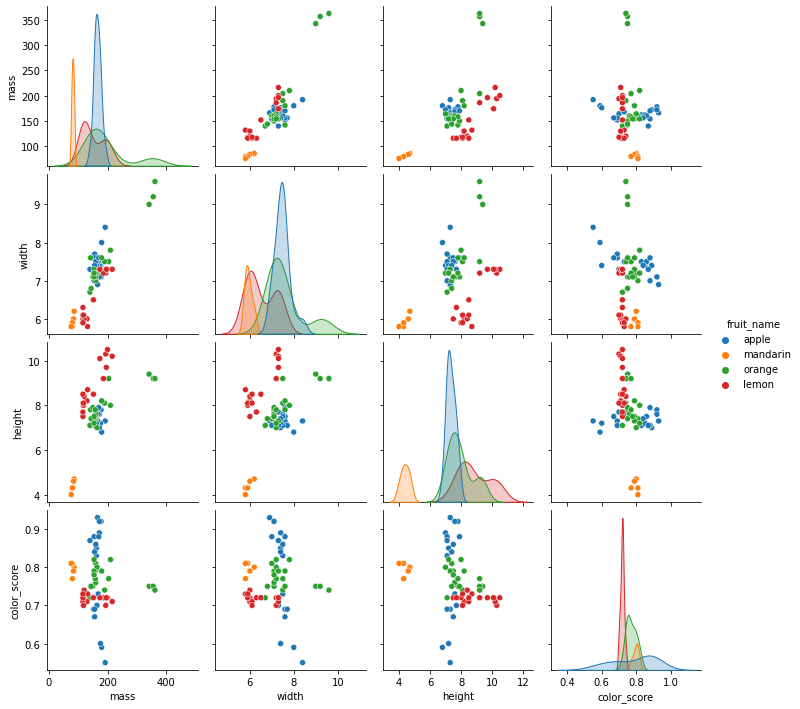

In [4]:
#### Scatter matrix

# Selecting data to plot
filtered_fruits = fruits.loc[:, ["fruit_name", "mass", "width", "height", "color_score"]]

# Plotting data
sns.pairplot(filtered_fruits, hue = "fruit_name", kind = "scatter")
plt.show()

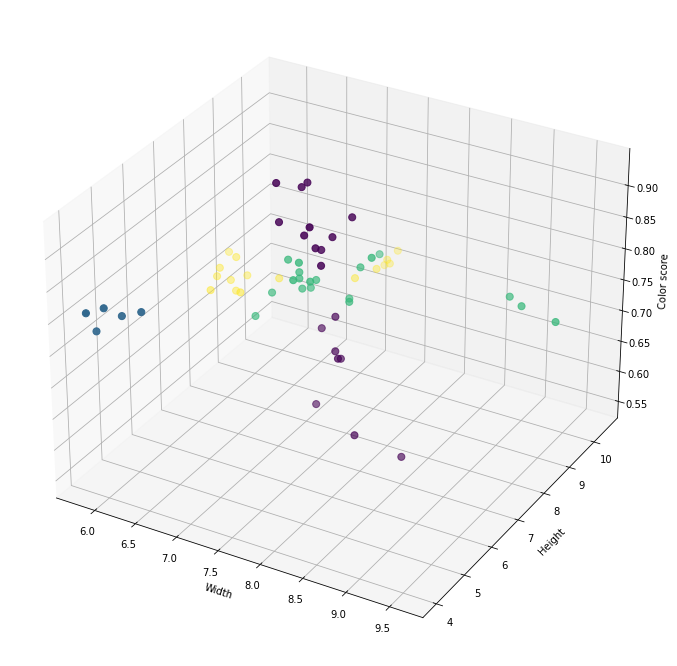

In [5]:
#### 3D Plot

# Matplotlib figure
fig = plt.figure( figsize = (12, 12))
ax = fig.add_subplot(111, projection = "3d")

# Actual plot
ax.scatter(fruits["width"], fruits["height"], fruits["color_score"], c = fruits["fruit_label"], marker = "o", s = 50)

# Axes labels
ax.set_xlabel("Width")
ax.set_ylabel("Height")
ax.set_zlabel("Color score")

plt.show()

# Train-test split

In [6]:
# Independent variables -> also called "feature space"
X = fruits.loc[:, ["mass", "width", "height"]]

# Dependent variable
y = fruits.loc[:, "fruit_label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Model: KNN Classifier

This models is an example of instance-based/memory-based unsupervised learning model, because it uses a measure of similarity to classify new observations.

- k -> number of nearest neighbors to take into account
- The zones where we transition from one class to another are called "decision boundaries".
- The classification is based on the euclidean-distance.
- In case k > 1, the algorithm uses a majority vote -> Ideally, we'll chose an odd number of k

We need to specify four things:
- A distance metric (tipically Euclidean)
- Nearest neighbors (k)
- Optional: weighting function on the neighbor points
- How to aggregate the classes of neighbor points (tipically: simple majority vote)

In [7]:
# Defining the model
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

# Training the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [8]:
# Let's see what the default hyperparameters of the model are
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
# To estimate the accuracy
model.score(X_test, y_test)

0.5333333333333333

In [10]:
# Let's try now to predict a new (invented) object
# Prediction
fruit_prediction = model.predict([[20, 4.3, 5.5]])
# Translation
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [11]:
# Let's do another test
fruit_prediction = model.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [12]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(np.array(X_train), np.array(y_train), 5, "uniform")

/Users/jonathansuarezcaceres/Downloads/data_science/coursera_appliedds_sp/3_AppliedMachineLearning/adspy_shared_utilities.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_mat = numpy.asmatrix(X[['height', 'width']])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

When k = 1, the predictions are very sensitive to noise, outliers, mislabeled data and other sources of variation in individual data points.

For larger values of Km the areas assigned to different classes are somother and not as fragmented and more robust to noise in the individual points. But possibly with some mistakes, more mistakes in individual points.

This is an example of variance-bias trade-off.

In [14]:
# Let's see how the results vary depending on the number of neighbors

# Range of ks we want to test
k_range = range(1, 20)
# Empty list to save the scores with the different number of ks
scores = []

# Iterate and test over the number of ks
for k in k_range:
    # Model
    model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    # Training
    model.fit(X_train, y_train)
    # Scores
    score = model.score(X_test, y_test)
    scores.append(score)

scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

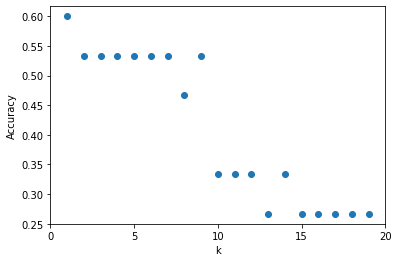

In [16]:
# Plotting the results
plt.figure()

plt.scatter(k_range, scores)

plt.xlabel("k")
plt.ylabel("Accuracy")

plt.xticks(range(0, 21, 5))
plt.show()